In [1]:
import glob
import math
import sys
import timeit

sys.path.insert(0, '../../')
from visualize_dataset import *
from losses import *
from metrics import *
from predict import *
from train import *
from utils import *

Using TensorFlow backend.


In [2]:
path_train_images = '../../../data/stanford_dwi_cropped/train/Slice/'
path_train_annotations = '../../../data/stanford_dwi_cropped/train/ROI/'
path_train_predictions = './predictions.50e/train/'

path_val_images = '../../../data/stanford_dwi_cropped/val/Slice/'
path_val_annotations = '../../../data/stanford_dwi_cropped/val/ROI/'
path_val_predictions = './predictions.50e/val/'

path_test_images = '../../../data/stanford_dwi_cropped/test/Slice/'
path_test_annotations = '../../../data/stanford_dwi_cropped/test/ROI/'
path_test_predictions = './predictions.50e/test/'

path_save_weights = './weights.50e/'
path_load_weights = None

train_vgg = False
path_vgg_weights = '../../../data/vgg16_weights_th_dim_ordering_th_kernels.h5'

n_classes = 2
input_height = 224
input_width = 224
n_channel_annotations = 1

In [3]:
print('Number train images: ', len(glob.glob(path_train_images + '*.png')))
print('Number val images: ', len(glob.glob(path_val_images + '*.png')))
print('Number test images: ', len(glob.glob(path_test_images + '*.png')))

Number train images:  192
Number val images:  11
Number test images:  12


In [4]:
model_name = 'vgg_unet_padded'
epochs = 50
train_batch_size = 8
val_batch_size = len(glob.glob(path_val_images + '*.png'))

In [5]:
optimizer = 'adadelta'
metrics = ['accuracy', dice, iou]

class_props = calc_class_proportions(path_train_annotations, n_classes, n_channel_annotations)
class_weights = calc_class_weights(path_train_annotations, n_classes, n_channel_annotations)
class_weights_log = calc_class_weights(path_train_annotations, n_classes, n_channel_annotations, scale = 'log')

print(class_props)
print(class_weights)
print(class_weights_log)

loss = weighted_categorical_crossentropy_loss(class_weights_log)

[0.98215531 0.01784469]
[ 1.         55.03908977]
[0.01800582 4.02604948]


Model output shape (None, 50176, 2)
Epoch 0
Epoch 1/1
24/24 [==============================] - 833s 35s/step - loss: 0.0493 - acc: 0.0712 - dice: 0.0368 - iou: 0.0188 - val_loss: 0.0304 - val_acc: 0.0074 - val_dice: 0.0146 - val_iou: 0.0073
Epoch 1
Epoch 1/1
24/24 [==============================] - 832s 35s/step - loss: 0.0420 - acc: 0.0178 - dice: 0.0350 - iou: 0.0178 - val_loss: 0.0235 - val_acc: 0.0101 - val_dice: 0.0146 - val_iou: 0.0074
Epoch 2
Epoch 1/1
24/24 [==============================] - 831s 35s/step - loss: 0.0320 - acc: 0.3624 - dice: 0.0710 - iou: 0.0375 - val_loss: 0.0197 - val_acc: 0.5947 - val_dice: 0.0350 - val_iou: 0.0178
Epoch 3
Epoch 1/1
24/24 [==============================] - 829s 35s/step - loss: 0.0245 - acc: 0.6442 - dice: 0.1019 - iou: 0.0541 - val_loss: 0.0147 - val_acc: 0.7277 - val_dice: 0.0508 - val_iou: 0.0261
Epoch 4
Epoch 1/1
24/24 [==============================] - 830s 35s/step - loss: 0.0255 - acc: 0.6189 - dice: 0.1059 - iou: 0.0569 - val_loss: 0

Epoch 40
Epoch 1/1
24/24 [==============================] - 826s 34s/step - loss: 0.0024 - acc: 0.9772 - dice: 0.6317 - iou: 0.4693 - val_loss: 0.0111 - val_acc: 0.8377 - val_dice: 0.0830 - val_iou: 0.0433
Epoch 41
Epoch 1/1
24/24 [==============================] - 827s 34s/step - loss: 0.0028 - acc: 0.9665 - dice: 0.5703 - iou: 0.4111 - val_loss: 0.1085 - val_acc: 0.9323 - val_dice: 0.1333 - val_iou: 0.0714
Epoch 42
Epoch 1/1
24/24 [==============================] - 826s 34s/step - loss: 0.0021 - acc: 0.9779 - dice: 0.6198 - iou: 0.4528 - val_loss: 0.2099 - val_acc: 0.9648 - val_dice: 0.1718 - val_iou: 0.0940
Epoch 43
Epoch 1/1
24/24 [==============================] - 832s 35s/step - loss: 0.0029 - acc: 0.9722 - dice: 0.5969 - iou: 0.4373 - val_loss: 0.2218 - val_acc: 0.9714 - val_dice: 0.1831 - val_iou: 0.1008
Epoch 44
Epoch 1/1
24/24 [==============================] - 831s 35s/step - loss: 0.0027 - acc: 0.9746 - dice: 0.6216 - iou: 0.4640 - val_loss: 0.2091 - val_acc: 0.9680 - val_d

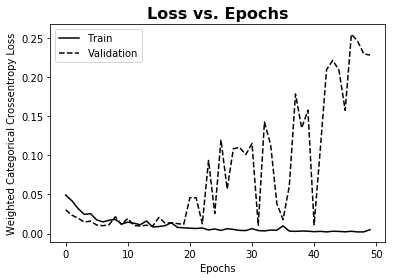

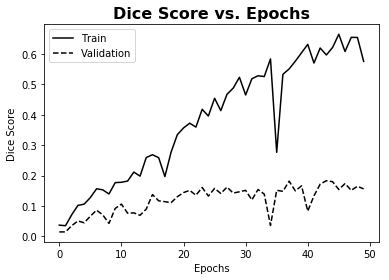

In [6]:
start = timeit.default_timer()
train(
    path_train_images, path_train_annotations, train_batch_size, 
    path_val_images, path_val_annotations, val_batch_size,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics,
    path_save_weights, path_vgg_weights = path_vgg_weights, train_vgg = train_vgg, path_load_weights = None
)
end = timeit.default_timer()

In [7]:
print('Total training time: ', end - start)

Total training time:  41574.529055641


In [14]:
epochs = 43

In [15]:
predict(
    path_train_images, path_train_annotations, path_train_predictions,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics, 
    path_save_weights
)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99   9461880
           1       0.51      1.00      0.67    171912

   micro avg       0.98      0.98      0.98   9633792
   macro avg       0.75      0.99      0.83   9633792
weighted avg       0.99      0.98      0.99   9633792

F1/dice (binary):  0.6734038260378999
Jaccard/IOU:  0.5076177960220309


In [ ]:
visualize_dataset(
    path_train_images, path_train_annotations, 
    n_classes, n_channel_annotations = n_channel_annotations,
    dir_predictions = path_train_predictions
)

In [17]:
predict(
    path_val_images, path_val_annotations, path_val_predictions,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics,
    path_save_weights
)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    547881
           1       0.10      0.50      0.17      4055

   micro avg       0.96      0.96      0.96    551936
   macro avg       0.55      0.73      0.58    551936
weighted avg       0.99      0.96      0.98    551936

F1/dice (binary):  0.17178907881836397
Jaccard/IOU:  0.09396567804514083


In [ ]:
visualize_dataset(
    path_val_images, path_val_annotations, 
    n_classes, n_channel_annotations = n_channel_annotations,
    dir_predictions = path_val_predictions
)

In [19]:
predict(
    path_test_images, path_test_annotations, path_test_predictions,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics,
    path_save_weights
)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    586517
           1       0.37      0.72      0.49     15595

   micro avg       0.96      0.96      0.96    602112
   macro avg       0.68      0.85      0.73    602112
weighted avg       0.98      0.96      0.97    602112

F1/dice (binary):  0.4877132368818829
Jaccard/IOU:  0.32250049975726075


In [ ]:
visualize_dataset(
    path_test_images, path_test_annotations, 
    n_classes, n_channel_annotations = n_channel_annotations, 
    dir_predictions = path_test_predictions
)